In [3]:
# 1. Image Classification with Dimensionality Reduction
# (a) Prepare two image classification datasets
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
mnist = load_digits()
X_mnist = mnist.data
y_mnist = mnist.target
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X_mnist, y_mnist, test_size=0.35, random_state=42)
lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X_lfw = lfw.data
y_lfw = lfw.target
X_lfw_train, X_lfw_test, y_lfw_train, y_lfw_test = train_test_split(X_lfw, y_lfw, test_size=0.35, random_state=42)

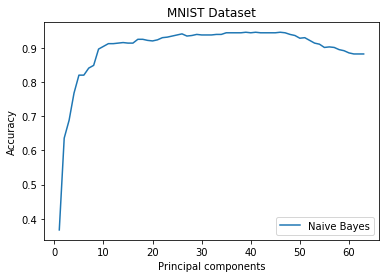

In [4]:
# (b) Train and evaluate classification algorithms
# Train and evaluate MNIST using Naive Bayes
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
mnist_features = len(X_mnist[0])
accuracy = []
principal = []
for i in range(1, 64):
    pca = PCA(n_components=i)
    pca.fit(X_mnist_train)
    X_mnist_train_reduced = pca.transform(X_mnist_train)
    X_mnist_test_reduced = pca.transform(X_mnist_test)
    gaussian_model = GaussianNB()
    gaussian_model.fit(X_mnist_train_reduced, y_mnist_train)
    y_predictedNB = gaussian_model.predict(X_mnist_test_reduced)
    accuracy.append(accuracy_score(y_predictedNB, y_mnist_test))
    principal.append(i)

plt.plot(principal, accuracy, label='Naive Bayes')
plt.ylabel('Accuracy')
plt.xlabel('Principal components')
plt.title('MNIST Dataset')
plt.legend()

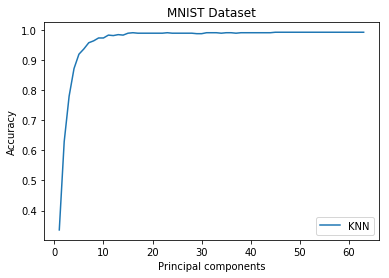

In [5]:
# Train and evaluate MNIST using KNN
accuracy = []
principal = []
for i in range(1, 64):
    pca = PCA(n_components=i)
    pca.fit(X_mnist_train)
    X_mnist_train_reduced = pca.transform(X_mnist_train)
    X_mnist_test_reduced = pca.transform(X_mnist_test)
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_mnist_train_reduced, y_mnist_train)
    y_predictedKNN = knn_model.predict(X_mnist_test_reduced)
    accuracy.append(accuracy_score(y_predictedKNN, y_mnist_test))
    principal.append(i)

plt.plot(principal, accuracy, label='KNN')
plt.ylabel('Accuracy')
plt.xlabel('Principal components')
plt.title('MNIST Dataset')
plt.legend()

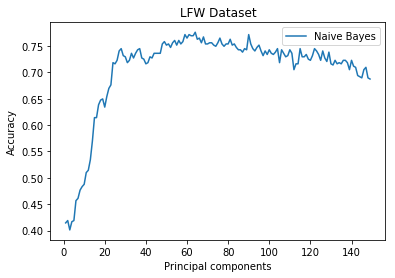

In [6]:
# Train and evaluate LFW using Naive Bayes
accuracy = []
principal = []
for i in range(1, 150):

    pca = PCA(n_components=i)
    pca.fit(X_lfw_train)
    X_lfw_train_reduced = pca.transform(X_lfw_train)
    X_lfw_test_reduced = pca.transform(X_lfw_test)
    gaussian_model = GaussianNB()
    gaussian_model.fit(X_lfw_train_reduced, y_lfw_train)
    y_predicted = gaussian_model.predict(X_lfw_test_reduced)
    accuracy.append(accuracy_score(y_predicted, y_lfw_test))
    principal.append(i)

plt.plot(principal, accuracy, label='Naive Bayes')
plt.ylabel('Accuracy')
plt.xlabel('Principal components')
plt.title('LFW Dataset')
plt.legend()

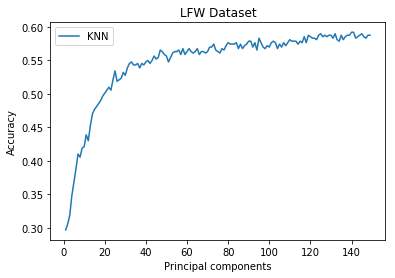

In [7]:
# Train and evaluate LFW using KNN
accuracy = []
principal = []
for i in range(1, 150):
    pca = PCA(i)
    pca.fit(X_lfw_train)
    X_lfw_train_reduced = pca.transform(X_lfw_train)
    X_lfw_test_reduced = pca.transform(X_lfw_test)
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_lfw_train_reduced, y_lfw_train)
    y_predicted = knn_model.predict(X_lfw_test_reduced)
    accuracy.append(accuracy_score(y_predicted, y_lfw_test))
    principal.append(i)

plt.plot(principal, accuracy, label='KNN')
plt.ylabel('Accuracy')
plt.xlabel('Principal components')
plt.title('LFW Dataset')
plt.legend()

In [ ]:
# 2. Ensemble Learning
# (a) Load two text-based classification datasets and pre-processing
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfTransformer

airline = pd.read_csv('dataset/Tweets.csv')
spam = pd.read_csv('dataset/YouTube-Spam-Collection-v1/Youtube01-Psy.csv')

count = CountVectorizer()
X_airline_bag = count.fit_transform(airline['text'][:2000]).toarray()
X_spam_bag = count.fit_transform(spam['CONTENT']).toarray()

tfidf = TfidfTransformer(use_idf=True, norm = 'l2', smooth_idf=True)
np.set_printoptions(precision=2)

X_airline_tfidf = tfidf.fit_transform(count.fit_transform(airline['text'][:2000])).toarray()
y_airline = airline['airline_sentiment'][:2000]

X_spam_tfidf = tfidf.fit_transform(count.fit_transform(spam['CONTENT'])).toarray()
y_spam = spam['CLASS']

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# (b)
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = KNeighborsClassifier()
eclf = VotingClassifier(estimators=[('lr', clf1), ('gnb', clf2), ('knn',
clf3)], voting='hard')
bagging = BaggingClassifier(max_samples=50)
boosting = AdaBoostClassifier(n_estimators =200)

for i in [clf1, clf2, clf3, eclf, bagging, boosting]:
    accuracies = cross_val_score(i, X_airline_tfidf, y_airline, cv=kfold)
    print(accuracies.mean())